
# Ramandeep Jagdev

# Git hub = Ramandeep72

# USC ID = 3023879240

# 2 late days are used 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from collections import defaultdict
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import defaultdict
import statistics
import warnings
warnings.filterwarnings('ignore')
import random 
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



In [8]:
df=pd.read_csv('../data/Frogs_MFCCs.csv')


In [9]:
y=df[['Family','Genus','Species']]


In [10]:
x= df.drop(['Family','Genus','Species','RecordID'],axis=1)
x = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=42)

In [11]:
train_data, test_data = train_test_split(df, train_size=0.7, shuffle=True)


In [12]:
X_train = train_data.iloc[:, :-4]
X_test = test_data.iloc[:, :-4]
y_train = train_data.iloc[:, -4:-1]
y_test = test_data.iloc[:, -4:-1]

In [13]:
targets = ['Family','Genus','Species']

# b ii)

In [9]:
%%time

#https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html
y_pred={}
for i in targets:
    
    parameters = [{
                   'gamma': [1e-4, 1e-3, 0.01, 0.1, 1, 10,100],
                   'C': [1, 10,100,1000]}]
    clf = GridSearchCV(estimator = svm.SVC(kernel='rbf', decision_function_shape='ovr'), param_grid = parameters ,cv=StratifiedKFold(n_splits=10, shuffle=True))
    clf.fit(X_train, y_train[[i]])
    print("Best parameters:".format(i))
    
    print(clf.best_params_)

    y_pred[i] = clf.predict(X_test)
    print(classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("hamming distance for classifier {}".format(hamming_loss(y_test[[i]].values.ravel(), y_pred[i])))
    
    print("---------------------------")


Best parameters:
{'C': 1000, 'gamma': 1}
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.86      0.92        21
  Dendrobatidae       0.99      1.00      1.00       167
        Hylidae       0.99      0.99      0.99       626
Leptodactylidae       0.99      1.00      0.99      1345

       accuracy                           0.99      2159
      macro avg       0.99      0.96      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

hamming distance for classifier 0.007410838351088467
---------------------------
Best parameters:
{'C': 100, 'gamma': 1}
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1260
     Ameerega       1.00      1.00      1.00       167
Dendropsophus       0.99      0.97      0.98        94
    Hypsiboas       0.99      0.98      0.99       471
Leptodactylus       0.93      0.98      0.95        85
Osteocephalus       0.88      0.92      0.90    

# b iii)

In [10]:
%%time



#https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html

y_pred={}

for i in targets:
    parameters = [{'C': [1, 10, 100, 1000],'max_iter':[2000]}]
    #same as above but need to change penalty 
    clf = GridSearchCV(estimator = svm.LinearSVC(multi_class='ovr',penalty='l1',dual=False), param_grid = parameters,cv=StratifiedKFold(n_splits=10, shuffle=True))
    clf.fit(X_train, y_train[[i]])
    print("Best Parameter {} :".format(i))
    print(clf.best_params_)

    y_pred[i] = clf.predict(X_test)
    print(classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("Hamming distance for classifier : {}".format(hamming_loss(y_test[[i]].values.ravel(), y_pred[i])))
    
    print("---------------------------")


Best Parameter Family :
{'C': 100, 'max_iter': 2000}
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        21
  Dendrobatidae       0.90      0.91      0.91       167
        Hylidae       0.90      0.90      0.90       626
Leptodactylidae       0.96      0.97      0.96      1345

       accuracy                           0.94      2159
      macro avg       0.69      0.70      0.69      2159
   weighted avg       0.93      0.94      0.93      2159

Hamming distance for classifier : 0.06484483557202408
---------------------------
Best Parameter Genus :
{'C': 10, 'max_iter': 2000}
               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.97      1260
     Ameerega       0.94      0.96      0.95       167
Dendropsophus       0.92      0.64      0.75        94
    Hypsiboas       0.92      0.97      0.94       471
Leptodactylus       0.95      0.91      0.93        85
Osteocephalus       0.75

# b iv)

In [11]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                
                                ['SVC', LinearSVC(penalty='l1', multi_class='ovr', dual=False)]])

parameters = [{'C': [1, 10, 100, 1000],'max_iter':[2000]}]

param_grid = {'SVC__C': [1,10,100,1000], 'SVC__max_iter':[2000]}

In [12]:
%%time

#https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html

for i in ['Family','Genus','Species']:
    #smote needs to be in pipeline
    pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                
                                ['SVC', LinearSVC(penalty='l1', multi_class='ovr', dual=False)]])

    
    
    #parameters = [{'C': [1, 10, 100, 1000],'max_iter':[2000]}]

    param_grid = {'SVC__C': [1,10,100,1000], 'SVC__max_iter':[2000]}
    clf = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True) )
    
    clf.fit(X_train, y_train[[i]])
    print("Best Parameter {} :".format(i))
    
    print(clf.best_params_)
    print("---------------------------")

    y_pred[i] = clf.predict(X_test)
    print(classification_report(y_test[[i]].values.ravel(), y_pred[i]))
    print("The hamming distance for class {}".format(hamming_loss(y_test[[i]].values.ravel(), y_pred[i])))
    
    print("---------------------------")


Best Parameter Family :
{'SVC__C': 100, 'SVC__max_iter': 2000}
---------------------------
                 precision    recall  f1-score   support

      Bufonidae       0.31      0.90      0.46        21
  Dendrobatidae       0.78      0.99      0.88       167
        Hylidae       0.91      0.86      0.88       626
Leptodactylidae       0.97      0.93      0.95      1345

       accuracy                           0.91      2159
      macro avg       0.74      0.92      0.79      2159
   weighted avg       0.93      0.91      0.92      2159

The hamming distance for class 0.08522464103751737
---------------------------
Best Parameter Genus :
{'SVC__C': 10, 'SVC__max_iter': 2000}
---------------------------
               precision    recall  f1-score   support

    Adenomera       0.99      0.91      0.95      1260
     Ameerega       0.88      0.97      0.92       167
Dendropsophus       0.63      0.85      0.73        94
    Hypsiboas       0.96      0.93      0.94       471
Leptod

# 2 a + b)

In [22]:
# clustering dataset
# determine k using elbow method
# k means determine k
K_2 = []
dist = []
blabels = []

#2c
hamming_losses = []
hamming_scores = []
hamming_distance = []

In [26]:
for i in (range(50)):
    
    #Ignore this, this is just to make the output easier to read
    #print("-------------")
    
    distances_list = []
    silhouettes = []
    final = []
    #all of the X_train values, but unsupervised so it is not xtrain
    inputs = df.iloc[:, :-4]
    for k in range(2, 15):
        # running the algoritm
        KMEANS = KMeans(n_clusters=k).fit(inputs)
        #specifying the Kmeans label and storing them 
        KMEANS_Labels = KMEANS.labels_
        final.append(KMEANS_Labels)
        # append the silhouettes
        silhouettes.append(silhouette_score(inputs, KMEANS_Labels))
        distances_list.append(sum(np.min(cdist(inputs, KMEANS.cluster_centers_, 'euclidean'), axis=1)) / inputs.shape[0])

    #finding the most optimal K
    K_val = np.argmax(silhouettes)
    optimal_K = K_val + 2
    K_2.append(best_k)
    dist.append(distances_list)
    best_labels = final[K_val]
    blabels.append(best_labels)
    print('Most Optimal K: ', optimal_K)
    
    
    ## B finding the majority class in each cluster
    output_of_df = df[['Family', 'Genus', 'Species']].copy()
    output_of_df['kmeans_label'] = best_labels
    majoirty_class = {}
    
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html
    for l in range(optimal_K):
        cluster = output_of_df[output_of_df['kmeans_label'] == l]
        majority_triplet = {}
        
        for target in targets:
            majority_triplet[target] = cluster[target].value_counts().idxmax()
        majoirty_class[l] = majority_triplet
    print("Majority labels:", majoirty_class)

    #compute hamming loss
    
    
    #compute hamming loss
    #part c
    
    #start it at 0
    incorrect_classifier = 0
    for l in range(optimal_K):
        cluster = output_of_df[output_of_df['kmeans_label'] == l]
        for tl in ['Family', 'Genus', 'Species']:
            incorrect_classifier += sum(cluster[tl] != majoirty_class[l][tl])
    hamming_loss = incorrect_classifier / (len(df) * 3)
    hamming_losses.append(hamming_loss)
    
    
    
    
    
    # Fraction of labels that are incorrectly predicted = Hamming Loss
    
    hamming_loss = incorrect_class / (len(df) * 3)
    hamming_losses.append(hamming_loss)
    
    
    # Fraction of labels that are correctly predicted = Hamming Score
    
    hamming_score = (1) - ((incorrect_class) / (len(df) * 3))
    hamming_scores.append(hamming_score)
    
    # Hamming Distance = total number of predictions that is not correct from the true label 
    hamming_distance.append(incorrect_class)
    
    
    
    #Ignore this, this is just to make the output easier to read
    print("-------------")

Most Optimal K:  4
Majority labels: {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
-------------
Most Optimal K:  4
Majority labels: {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
-------------
Most Optimal K:  4
Majority labels: {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2

# 2c)

In [ ]:
print('Mean of Hamming Loss', np.mean(hamming_losses))


In [ ]:
print('Mean of Hamming scores', 1 - np.mean(hamming_losses))


In [ ]:
print('Mean of Hamming Distance', np.mean(hamming_distance))


# 12.6.2)

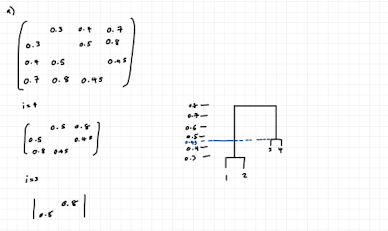

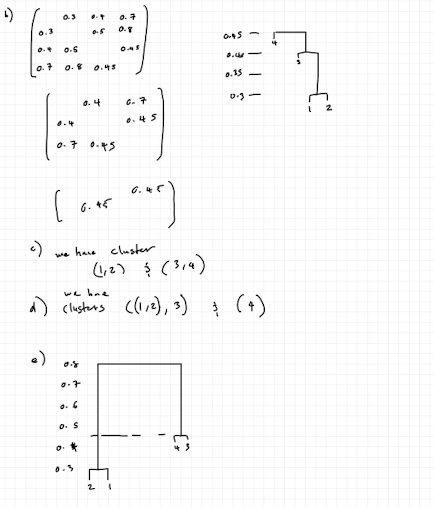